In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data 

In [8]:
pip install --upgrade pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
start='2012-01-01'
end='2022-06-01'

df = data.DataReader('AAPL','yahoo',start, end)


In [12]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557466
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624949
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765116
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898556
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097


In [13]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-25,141.789993,138.339996,138.429993,140.520004,92482700.0,140.520004
2022-05-26,144.339996,137.139999,137.389999,143.779999,90601500.0,143.779999
2022-05-27,149.679993,145.259995,145.389999,149.639999,90978500.0,149.639999
2022-05-31,150.660004,146.839996,149.070007,148.839996,103718400.0,148.839996
2022-06-01,151.740005,147.679993,149.899994,148.710007,74286600.0,148.710007


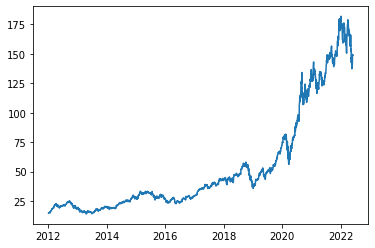

In [14]:
plt.plot(df.Close)

In [15]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557466
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624949
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765116
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898556
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097
...,...,...,...,...,...,...
2022-05-25,141.789993,138.339996,138.429993,140.520004,92482700.0,140.520004
2022-05-26,144.339996,137.139999,137.389999,143.779999,90601500.0,143.779999
2022-05-27,149.679993,145.259995,145.389999,149.639999,90978500.0,149.639999


In [16]:
ma100=df.Close.rolling(100).mean()
ma100

Date
2012-01-03         NaN
2012-01-04         NaN
2012-01-05         NaN
2012-01-06         NaN
2012-01-09         NaN
                ...   
2022-05-25    164.3734
2022-05-26    163.9911
2022-05-27    163.6905
2022-05-31    163.4297
2022-06-01    163.1968
Name: Close, Length: 2621, dtype: float64

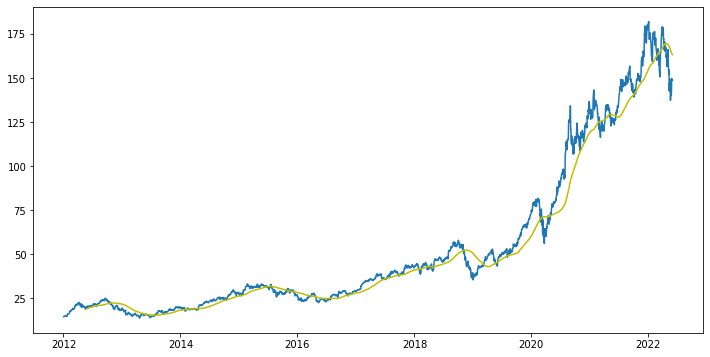

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'y')

In [18]:
ma200=df.Close.rolling(200).mean()
ma200

Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
                ...    
2022-05-25    159.50665
2022-05-26    159.49625
2022-05-27    159.50000
2022-05-31    159.49870
2022-06-01    159.48665
Name: Close, Length: 2621, dtype: float64

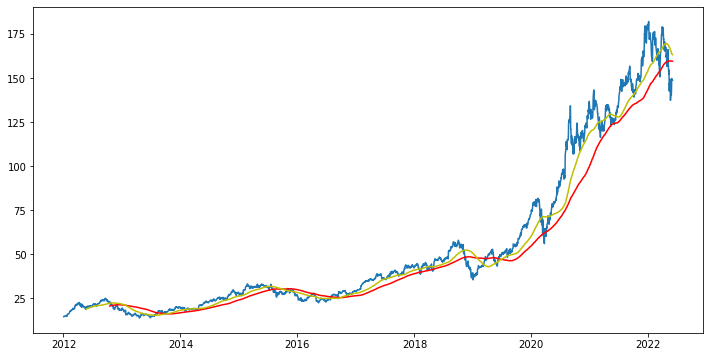

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'r')
plt.plot(ma100,'y')

In [20]:
df.shape

(2621, 6)

In [21]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1834, 1)
(787, 1)


In [22]:
 data_training.head()

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [23]:
data_testing.head()

,Close
Date,
2019-04-18,50.965000
2019-04-22,51.132500
2019-04-23,51.869999
2019-04-24,51.790001
2019-04-25,51.320000


In [24]:
from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler(feature_range=(0,1))

In [25]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.81370541],
       [0.81381889],
       [0.83582935]])

In [26]:
data_training_array.shape

(1834, 1)

In [39]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
             


In [41]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import tensorflow as tf

In [45]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , LSTM 

In [46]:
model= Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [47]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50 )

Epoch 1/50
55/55 [==============================] - 20s 263ms/step - loss: 0.0353
Epoch 2/50
55/55 [==============================] - 21s 380ms/step - loss: 0.0083
Epoch 3/50
55/55 [==============================] - 15s 268ms/step - loss: 0.0063
Epoch 4/50
55/55 [==============================] - 14s 263ms/step - loss: 0.0056
Epoch 5/50
55/55 [==============================] - 14s 260ms/step - loss: 0.0056
Epoch 6/50
55/55 [==============================] - 15s 280ms/step - loss: 0.0055
Epoch 7/50
55/55 [==============================] - 15s 265ms/step - loss: 0.0047
Epoch 8/50
55/55 [==============================] - 15s 264ms/step - loss: 0.0052
Epoch 9/50
55/55 [==============================] - 15s 282ms/step - loss: 0.0048
Epoch 10/50
55/55 [==============================] - 14s 262ms/step - loss: 0.0048
Epoch 11/50
55/55 [==============================] - 14s 261ms/step - loss: 0.0045
Epoch 12/50
55/55 [==============================] - 14s 262ms/step - loss: 0.0043
Epoch 13/50
5

In [48]:
model.save('keras_model.h5')

In [49]:
data_testing.head()


,Close
Date,
2019-04-18,50.965000
2019-04-22,51.132500
2019-04-23,51.869999
2019-04-24,51.790001
2019-04-25,51.320000


In [50]:
data_training.tail(100)

,Close
Date,
2018-11-21,44.195000
2018-11-23,43.072498
2018-11-26,43.654999
2018-11-27,43.560001
2018-11-28,45.235001
...,...
2019-04-11,49.737499
2019-04-12,49.717499
2019-04-15,49.807499


In [51]:
past_100_days=data_training.tail(100)

In [52]:
final_df=past_100_days.append(data_testing, ignore_index=True)

In [53]:
final_df.head()

,Close
0,44.195000
1,43.072498
2,43.654999
3,43.560001
4,45.235001


In [54]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.05904241],
       [0.05137833],
       [0.05535546],
       [0.05470684],
       [0.06614321],
       [0.06377059],
       [0.06211488],
       [0.07276608],
       [0.0588888 ],
       [0.05552616],
       [0.04489204],
       [0.04678673],
       [0.04513101],
       [0.04593327],
       [0.04909106],
       [0.03975419],
       [0.03712555],
       [0.0407613 ],
       [0.03191943],
       [0.02498933],
       [0.0145771 ],
       [0.00792012],
       [0.02556968],
       [0.02382861],
       [0.02396517],
       [0.02654264],
       [0.02684987],
       [0.        ],
       [0.010361  ],
       [0.00979771],
       [0.01461125],
       [0.01898096],
       [0.01981736],
       [0.01723989],
       [0.01333105],
       [0.01857132],
       [0.02176325],
       [0.02333362],
       [0.02497227],
       [0.0189639 ],
       [0.02002218],
       [0.01793974],
       [0.02657676],
       [0.02408467],
       [0.02131943],
       [0.03936161],
       [0.04139285],
       [0.041

In [55]:
input_data.shape

(887, 1)

In [56]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [58]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(787, 100, 1)
(787,)


In [59]:
y_predicted = model.predict(x_test) 

In [60]:
y_predicted.shape

(787, 1)

In [61]:
y_test

array([0.10526585, 0.10640949, 0.1114449 , 0.1108987 , 0.10768968,
       0.1060169 , 0.10654605, 0.09982077, 0.11663396, 0.11429546,
       0.11873346, 0.11315182, 0.10355893, 0.1036272 , 0.09990612,
       0.0938636 , 0.0743023 , 0.07932065, 0.08317828, 0.08174448,
       0.079901  , 0.06981308, 0.0758044 , 0.06928394, 0.06395836,
       0.06278058, 0.06151744, 0.06006658, 0.06163694, 0.05612359,
       0.05310233, 0.06392421, 0.06887427, 0.07344884, 0.08186395,
       0.08601178, 0.08981821, 0.08875993, 0.08869163, 0.08628489,
       0.08824784, 0.0960314 , 0.09504138, 0.09775541, 0.09659469,
       0.09625331, 0.09111549, 0.09833576, 0.09823335, 0.09512674,
       0.10132287, 0.10333702, 0.10620467, 0.10589741, 0.09871128,
       0.10079373, 0.10419049, 0.10166425, 0.10430998, 0.10757021,
       0.10635828, 0.10439533, 0.10833832, 0.10309806, 0.11100111,
       0.11376632, 0.11347614, 0.11065973, 0.11188872, 0.11520012,
       0.11366391, 0.12093538, 0.11306647, 0.10553897, 0.08730

In [62]:
y_predicted

array([[0.10220848],
       [0.10335992],
       [0.10451393],
       [0.10569771],
       [0.10693179],
       [0.10821106],
       [0.10950935],
       [0.1107944 ],
       [0.11200669],
       [0.11315119],
       [0.11424436],
       [0.11531666],
       [0.11637345],
       [0.11737472],
       [0.11827115],
       [0.11900446],
       [0.11950488],
       [0.11969109],
       [0.11950657],
       [0.11893087],
       [0.11797283],
       [0.11666429],
       [0.11503742],
       [0.11314435],
       [0.11103595],
       [0.10875569],
       [0.10634553],
       [0.10384755],
       [0.10130352],
       [0.09875987],
       [0.09625269],
       [0.09380744],
       [0.09146956],
       [0.08929904],
       [0.08736464],
       [0.08574386],
       [0.0845051 ],
       [0.08371092],
       [0.08339043],
       [0.08353497],
       [0.0840954 ],
       [0.08500378],
       [0.0862062 ],
       [0.08764784],
       [0.08927812],
       [0.09104201],
       [0.09288156],
       [0.094

In [63]:
scaler.scale_

array([0.00682769])

In [71]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

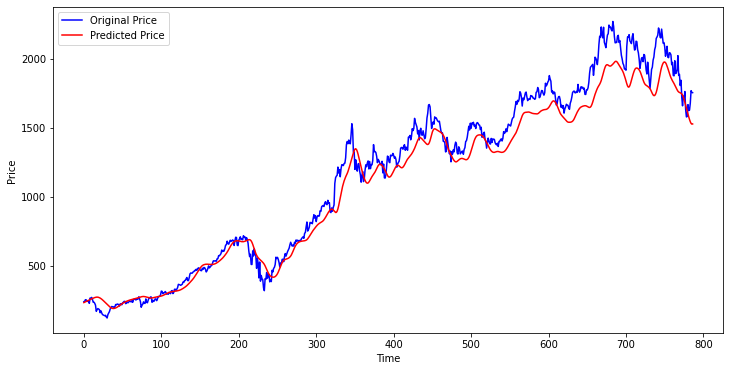

In [80]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Price')
plt.plot(y_predicted, 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show() 

# New Section

# New Section